# Continuous Control with DDPG

This notebook seeks to solve the first version of Udacity's Continuous Control project.

## Unity ML-Agents environment
This notebook will use the [Reacher](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Learning-Environment-Examples.md#reacher) environment.

In this environment, a double-jointed arm can move to target locations. A reward of +0.1 is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of 33 variables corresponding to position, rotation, velocity, and angular velocities of the arm. Each action is a vector with four numbers, corresponding to torque applicable to two joints. Every entry in the action vector should be a number between -1 and 1.

## Objective
The task is episodic, and in order to solve the environment, the agent must get an average score of +30 over 100 consecutive episodes.

### Import the Necessary Packages

In [1]:
from unityagents import UnityEnvironment
import numpy as np

### Download the environment

For this project, you will not need to install Unity - this is because Udacity have already built the environment for you, and you can download it from one of the links below. You need only select the environment that matches your operating system:

#### Version 1: One (1) Agent
 * Linux: click [here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P2/Reacher/one_agent/Reacher_Linux.zip)
 * Mac OSX: click [here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P2/Reacher/one_agent/Reacher.app.zip)
 * Windows (32-bit): click [here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P2/Reacher/one_agent/Reacher_Windows_x86.zip)
 * Windows (64-bit): click [here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P2/Reacher/one_agent/Reacher_Windows_x86_64.zip)

#### Version 2: Twenty (20) Agents
 * Linux: click [here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P2/Reacher/Reacher_Linux.zip)
 * Mac OSX: click [here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P2/Reacher/Reacher.app.zip)
 * Windows (32-bit): click [here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P2/Reacher/Reacher_Windows_x86.zip)
 * Windows (64-bit): click [here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P2/Reacher/Reacher_Windows_x86_64.zip)

## Version 2

### Start the Environment

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='version_2/Reacher_Windows_x86_64/Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[1], state_size))
print('The state for the agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 33 agents. Each observes a state with length: 33
The state for the agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### Instantiate the Agent

In [5]:
from collections import deque
import torch
from ddpg_agent import Agent
import matplotlib.pyplot as plt
%matplotlib inline

agent = Agent(state_size=state_size, action_size=action_size, random_seed=2)

### Train the agent with DDPG

Episode 10	Average Score: 0.87
Episode 20	Average Score: 1.30
Episode 30	Average Score: 2.21
Episode 40	Average Score: 3.45
Episode 50	Average Score: 5.15
Episode 60	Average Score: 7.04
Episode 70	Average Score: 8.84
Episode 80	Average Score: 10.27
Episode 90	Average Score: 11.40
Episode 100	Average Score: 12.52
Episode 110	Average Score: 14.71
Episode 120	Average Score: 17.00
Episode 130	Average Score: 19.14
Episode 140	Average Score: 21.16
Episode 150	Average Score: 22.91
Episode 160	Average Score: 24.24
Episode 170	Average Score: 25.30
Episode 180	Average Score: 26.33
Episode 190	Average Score: 27.47
Episode 200	Average Score: 28.06
Episode 210	Average Score: 28.56
Episode 220	Average Score: 29.15
Episode 230	Average Score: 29.97
Episode 231	Average Score: 30.06
Environment solved in {} episodes! 231


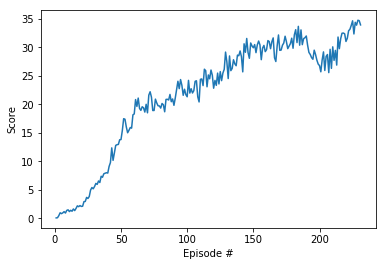

In [6]:
def ddpg(n_episodes=10000, max_t=3000, print_every=10):
    avg_scores_deque = deque(maxlen=100)
    avg_scores = []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        episode_scores = np.zeros(num_agents)
        agent.reset()
        for t in range(max_t):
            actions = agent.act(states, False)
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            agent.step(states, actions, rewards, next_states, dones)
            states = next_states
            episode_scores += rewards
            if np.any(dones):
                break
                
        avg_score = np.mean(episode_scores)
        avg_scores_deque.append(avg_score)
        avg_scores.append(avg_score)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(avg_scores_deque)), end="")
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(avg_scores_deque)))
        if np.mean(avg_scores_deque) > 30.0 and i_episode > 100:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            print('\nEnvironment solved in {} episodes!'.format(i_episode))
            break
            
    return avg_scores

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### Watch the trained agent

In [7]:
def watch(max_t=100):
    env_info = env.reset(train_mode=False)[brain_name]
    states = env_info.vector_observations
    agent.reset()
    for t in range(max_t):
        actions = agent.act(states, False)
        env_info = env.step(actions)[brain_name]
        next_states = env_info.vector_observations
        rewards = env_info.rewards
        dones = env_info.local_done
        agent.step(states, actions, rewards, next_states, dones)
        states = next_states
        if np.any(dones):
            break

watch()

In [8]:
env.close()

### Version 1

In [9]:
env = UnityEnvironment(file_name='version_1/Reacher_Windows_x86_64/Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode 10	Average Score: 32.85
Episode 20	Average Score: 32.64
Episode 30	Average Score: 32.95
Episode 40	Average Score: 32.57
Episode 50	Average Score: 32.06
Episode 60	Average Score: 32.41
Episode 70	Average Score: 32.61
Episode 80	Average Score: 32.82
Episode 90	Average Score: 32.95
Episode 100	Average Score: 33.01


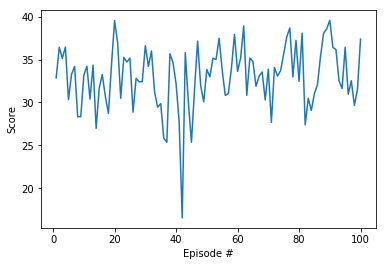

In [10]:
scores = ddpg(n_episodes=100)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [11]:
watch()

In [12]:
env.close()